<a href="https://colab.research.google.com/github/june12mayank/Machine_learning_notebooks/blob/master/machinehack_deliverytime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!wget 'https://www.machinehack.com/wp-content/uploads/2019/11/Participants-Data-20191108T095009Z-001.zip'

--2019-11-13 19:19:26--  https://www.machinehack.com/wp-content/uploads/2019/11/Participants-Data-20191108T095009Z-001.zip
Resolving www.machinehack.com (www.machinehack.com)... 107.180.71.20
Connecting to www.machinehack.com (www.machinehack.com)|107.180.71.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 586318 (573K) [application/zip]
Saving to: ‘Participants-Data-20191108T095009Z-001.zip.1’

Participants-Data-2 100%[===================>] 572.58K   369KB/s    in 1.6s    

2019-11-13 19:19:28 (369 KB/s) - ‘Participants-Data-20191108T095009Z-001.zip.1’ saved [586318/586318]



In [32]:
!unzip '/content/Participants-Data-20191108T095009Z-001.zip'

Archive:  /content/Participants-Data-20191108T095009Z-001.zip
replace Participants Data/Sample_Submission.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Participants Data/Sample_Submission.xlsx  
  inflating: Participants Data/Data_Test.xlsx  
  inflating: Participants Data/Data_Train.xlsx  


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
df=pd.read_excel('/content/Participants Data/Data_Train.xlsx')
test=pd.read_excel('/content/Participants Data/Data_Test.xlsx')
sample=pd.read_excel('/content/Participants Data/Sample_Submission.xlsx')

In [35]:
for i in df.columns.values:
  print(df[i].is_unique)

False
False
False
False
False
False
False
False
False


In [36]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.2+ KB


In [38]:
df.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [39]:
from re import sub

money = '$6,150,593.22'
value = float(sub(r'[^\d]', '', money))
value

615059322.0

In [0]:
def str2int(string):
    return ((''.join(ch for ch in string if ch.isdigit())).lstrip(''))

In [0]:
df.Average_Cost = df.Average_Cost.apply(str2int)

In [0]:
df.Average_Cost = pd.to_numeric(df.Average_Cost, errors='coerce').fillna(0).astype(np.int64)

In [43]:
df.Average_Cost.dtype

dtype('int64')

In [0]:
df.Minimum_Order= df.Minimum_Order.apply(str2int)
df.Minimum_Order = pd.to_numeric(df.Minimum_Order, errors='coerce').fillna(0).astype(np.int64)
df.Rating = pd.to_numeric(df.Rating, errors='coerce').fillna(0).astype(np.float64)
df.Votes = pd.to_numeric(df.Votes, errors='coerce').fillna(0).astype(np.int64)
df.Reviews = pd.to_numeric(df.Reviews, errors='coerce').fillna(0).astype(np.int64)
df.Delivery_Time=df.Delivery_Time.apply(str2int)
df.Delivery_Time = pd.to_numeric(df.Delivery_Time, errors='coerce').fillna(0).astype(np.int64)

In [0]:
test.Average_Cost = test.Average_Cost.apply(str2int)
test.Average_Cost = pd.to_numeric(test.Average_Cost, errors='coerce').fillna(0).astype(np.int64)
test.Minimum_Order= test.Minimum_Order.apply(str2int)
test.Minimum_Order = pd.to_numeric(test.Minimum_Order, errors='coerce').fillna(0).astype(np.int64)
test.Rating = pd.to_numeric(test.Rating, errors='coerce').fillna(0).astype(np.float64)
test.Votes = pd.to_numeric(test.Votes, errors='coerce').fillna(0).astype(np.int64)
test.Reviews = pd.to_numeric(test.Reviews, errors='coerce').fillna(0).astype(np.int64)

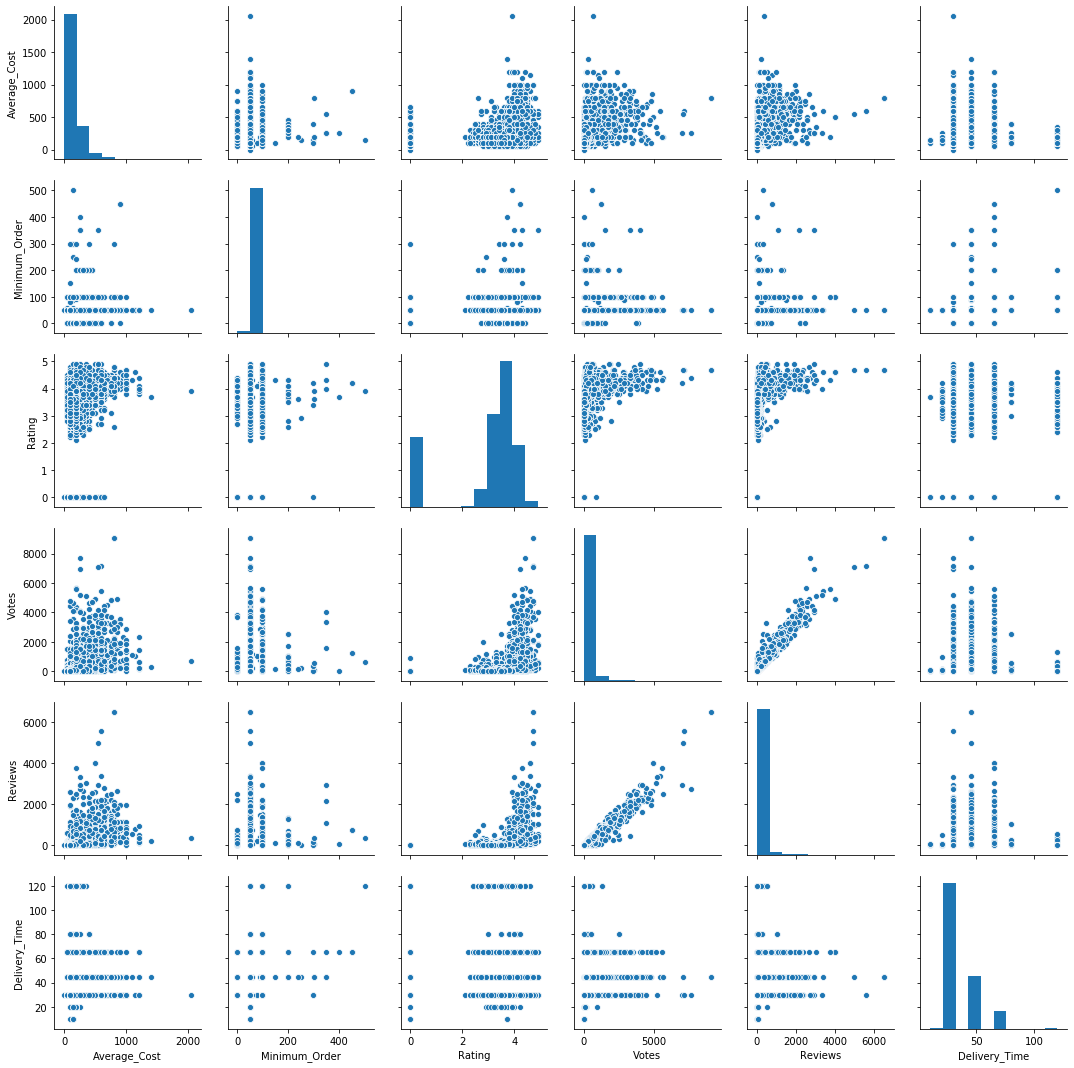

In [46]:
sns.pairplot(df)

In [47]:
df.corr()

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
Average_Cost,1.000000,0.117170,0.253355,0.459537,0.473374,0.175236
Minimum_Order,0.117170,1.000000,0.091626,0.132311,0.130318,0.254186
Rating,0.253355,0.091626,1.000000,0.290212,0.263816,0.236128
Votes,0.459537,0.132311,0.290212,1.000000,0.964935,0.225232
Reviews,0.473374,0.130318,0.263816,0.964935,1.000000,0.198343
Delivery_Time,0.175236,0.254186,0.236128,0.225232,0.198343,1.000000


In [48]:
sample['Delivery_Time'][0]

'120 minutes'

In [0]:
colmn=['Average_Cost','Minimum_Order','Rating','Votes','Reviews']
X=df[colmn]
y=df['Delivery_Time']
test=test[colmn]

In [0]:
def int2str(integer):
    return str(integer)+(' minutes')

In [0]:
from sklearn.linear_model import Ridge
clf0=Ridge(alpha=1.0)
clf0.fit(X,y)
y0=clf0.predict(test)

In [0]:
from sklearn.svm import SVR
clf1=SVR(gamma='scale',C=1.0,epsilon=0.2)
clf1.fit(X,y)
y1=clf1.predict(test)

In [54]:
from sklearn.ensemble import RandomForestRegressor 
regr=RandomForestRegressor()
regr.fit(X,y)
y2=regr.predict(test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
y_test=y1 #y0,y1,y2

In [0]:
sample['Delivery_Time']=y_test
sample.Delivery_Time=sample.Delivery_Time.apply(int2str)
sample.to_csv('submission2.csv',index=False)

In [0]:
from pandas import ExcelWriter

writer = ExcelWriter('output1.xlsx')
sample.to_excel(writer,index=False)
writer.save()